In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-bright')
plt.style.use('seaborn-whitegrid')

In [5]:
def read_data_xgrid(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None, x_grid = None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            for x_dim in x_grid:
                name_tail = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
                name_tail_false = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
                name_tail_true = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
                if method == 'entropy':
                    name = dir + '/'+method+ name_tail
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)
                elif method == 'iceo' :
                    name = dir + '/'+method+ name_tail_false
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)

                elif method == 'iceo+entropy' :
                    method_name = 'iceo'
                    name = dir + '/'+method_name+ name_tail_true
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)

                elif method == 'cvxpy':
                    name = dir + '/'+method+ name_tail
                    data = pd.read_csv(name)[method].values
                    data = np.sort(data)
                    data_list.append(data)
                # elif method =='forest0':
                    # name = dir + '/forest'+ name_tail
                    # data = pd.read_csv(name)['forest'].values
                    # data = np.sort(data)
                    # data_list.append(data)
                else:
                    # name = dir + '/baseline'+ name_tail
                    name = dir + '/forest'+ name_tail
                    data = pd.read_csv(name)[method].values
                    data = np.sort(data)
                    data_list.append(data)
    return data_list

## Figure 6

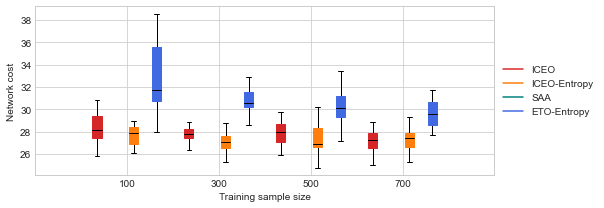

In [10]:
# 25 simulations
# model mis-specification
# multi generation
# linear prediction
# 0.5 entropy regularization


# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='multi_layer'
dir = 'iceo_results/2023-06-13_19-56-57'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-misspecification.pdf')

## Figure 5

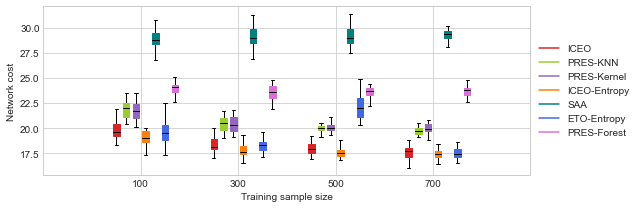

In [ ]:
## Figure 5 (a)
# well-specification K=5
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_00-33-29'
dir2 = 'iceo_results/forest-dim5-2024-07-21_13-42-03/'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation, x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)

import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )

#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('nf-iid-K5.pdf')

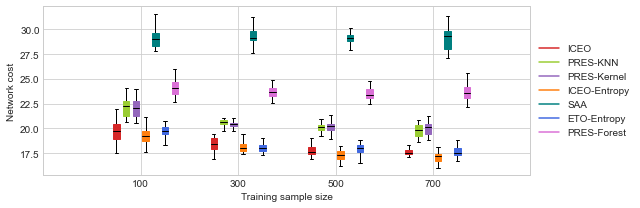

In [ ]:
## Figure 5 (b)
# well-specification K=10
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_13-15-03'
dir2 = 'iceo_results/forest-dim10-2024-06-05_14-45-29'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation, x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-iid-K10.pdf')

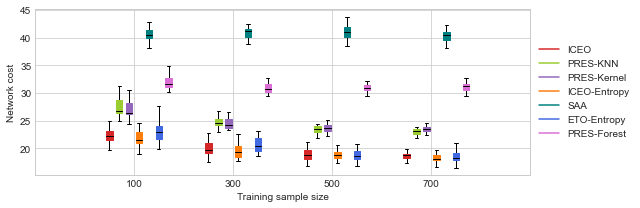

In [ ]:
## Figure 5 (c)
# well-specification K=15
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_13-54-38'
dir2 = 'iceo_results/forest-dim15-2024-07-20_21-19-45/'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation,x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-iid-K15.pdf')

## Figure 10

In [9]:
def read_data2(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            # name_tail_reg = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+'reg'+str(True)+'.csv'
            if method == 'entropy':
                method_name = 'entropy_model '
                name = dir + '/'+method_name+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo+reg' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_reg
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)


            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            elif method =='forest0':
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)['forest'].values
                data = np.sort(data)
                data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

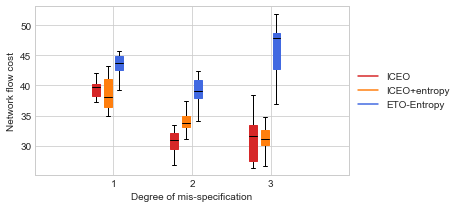

In [10]:
## Figure 10 (c)

# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-23_02-04-23'
entropy_dir = 'iceo_results/2024-08-23_01-31-41'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (6.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.9, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Degree of mis-specification")
plt.ylabel("Network flow cost")
plt.tight_layout()
plt.savefig('Network-mismatch.pdf')

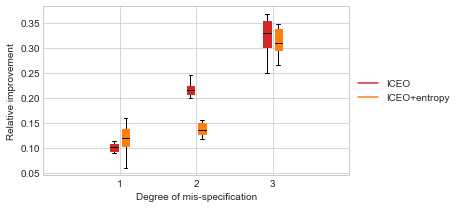

In [13]:
## Figure 10 (d)


# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-23_02-04-23'
entropy_dir = 'iceo_results/2024-08-23_01-31-41'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (6.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot([(b-a)/b for a, b in zip(iceo, entropy)], positions=np.array(range(len(iceo)))*a-0.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot([(b-a)/b for a, b in zip(iceo_entropy, entropy)], positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp2 = plt.boxplot([(a - b)/b for a, b in zip(entropy, entropy)], positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#
set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
# plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Degree of mis-specification")
plt.ylabel("Relative improvement")
plt.tight_layout()
# plt.savefig('network-mismatch-relative.pdf')